## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score





In [4]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Load the dataset

### 1. Make a list of categorical and numerical columns in the data.

In [5]:
# To display numeric categories
l_num = list(df.describe())
print(l_num)

['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [6]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [7]:
series = df.groupby('sex')['tip'].mean()
print("Generous gender: [", series.idxmax(), "] with value: ", max(series))


Generous gender: [ Male ] with value:  3.0896178343949043


### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
s = df.groupby('time')['size'].count()
print ("More customers for meals: ", s.idxmax(), ". Value: ", max(s), ".")


More customers for meals:  Dinner . Value:  176 .


### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [10]:
s=df.groupby('day')['size'].sum()
print(s)
print("\n\nBusiest day Orders: ", max(s))


day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64


Busiest day Orders:  219


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

Mean is positive, ie, right skewed.
Plot is displayed below for reference: 


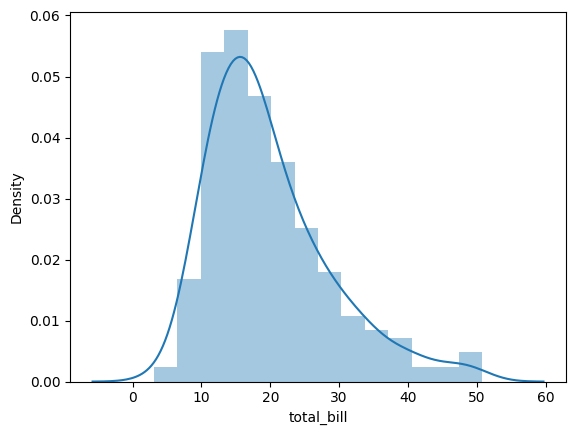

In [11]:
if df['total_bill'].mean(axis=0) > df['total_bill'].median(axis=0):
    print ("Mean is positive, ie, right skewed.")
if df['total_bill'].mean(axis=0) < df['total_bill'].median(axis=0):
    print ("Mean is negative, left skewed.")
if df['total_bill'].mean(axis=0) == df['total_bill'].median(axis=0):
    print ("Skew is balanced.")

print("Plot is displayed below for reference: ")
sns.distplot(df['total_bill'])
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

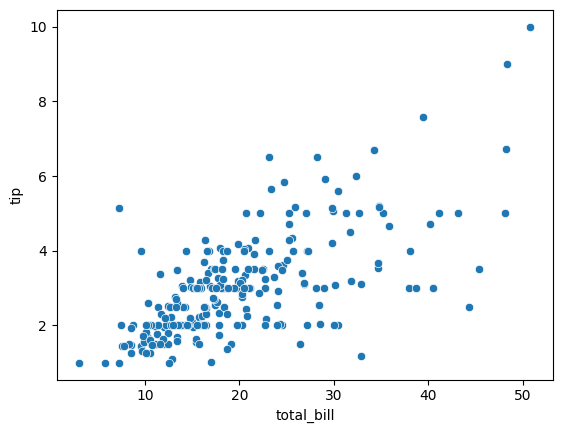

My findings: Though the data is scattered mostly around Initial Bill values 10~20, however, technically, 
it shows positive inclination, 
the more the Bill amount, higher the tip.


In [12]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.show()
print("My findings: Though the data is scattered mostly around Initial Bill values 10~20, however, technically, \nit shows positive inclination, \nthe more the Bill amount, higher the tip.")

### 9. What is the percentage of males and females in the dataset? and display it in the plot

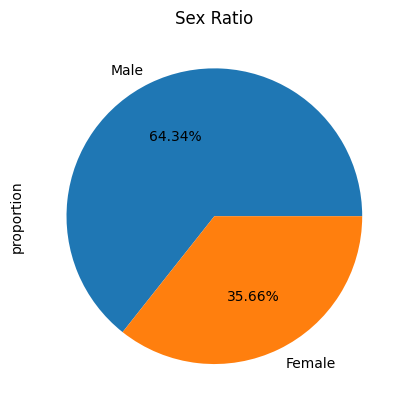

In [13]:
df['sex'].value_counts(normalize=True).plot(kind='pie', title='Sex Ratio', autopct='%.2f%%' )
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

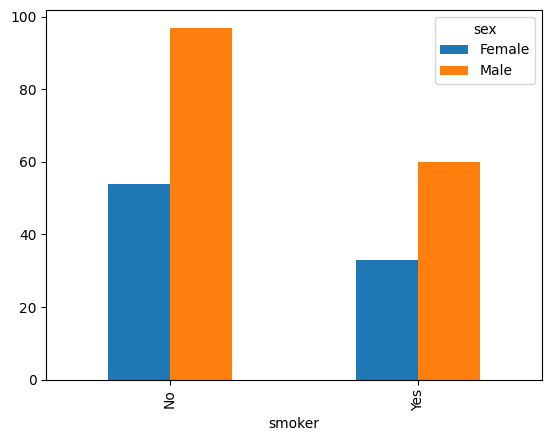

In [20]:
#df.groupby('sex')['smoker'].value_counts()
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

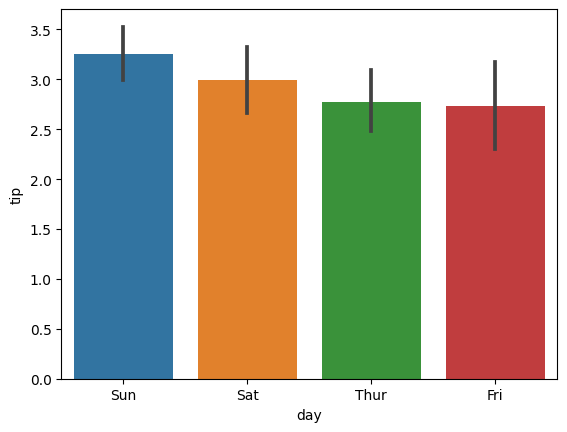

In [23]:
#df.groupby('day')['tip'].mean().plot(kind='bar')
sns.barplot(x='day', y='tip', data=df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

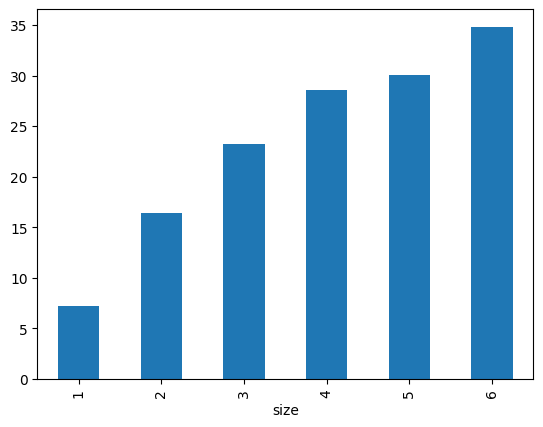

In [25]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

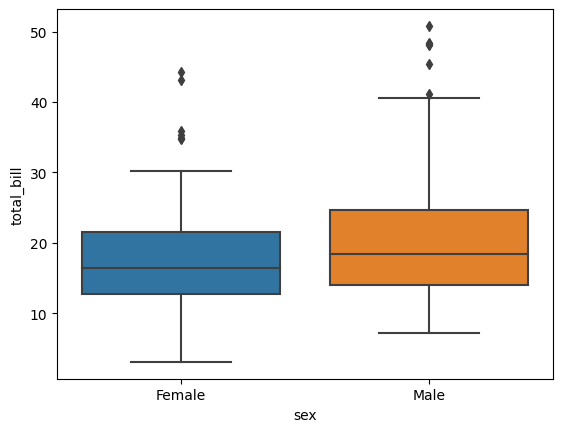

In [28]:
sns.boxplot(x='sex', y='total_bill', data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [52]:
df_x = df.groupby(['time','day'], as_index=False)['total_bill'].max()
df_x [ (df_x['day'] == 'Sat') | (df_x['day'] == 'Sun')]



,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


### 15. Compute the percentage of missing values in the dataset.

In [53]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [61]:
print("Number of duplicate record(s): ", len(df[df.duplicated()]))
df.drop_duplicates(inplace=True)


Number of duplicate record(s):  1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

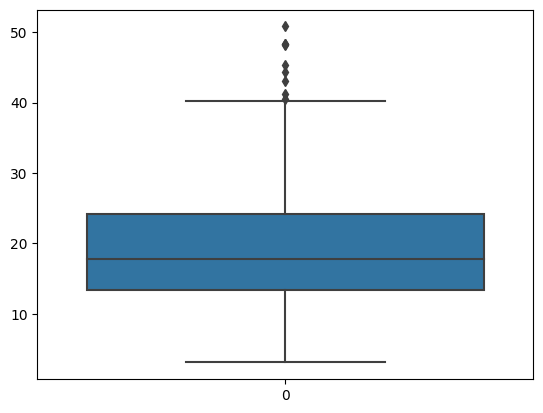

In [68]:
sns.boxplot(df['total_bill'])
plt.show()

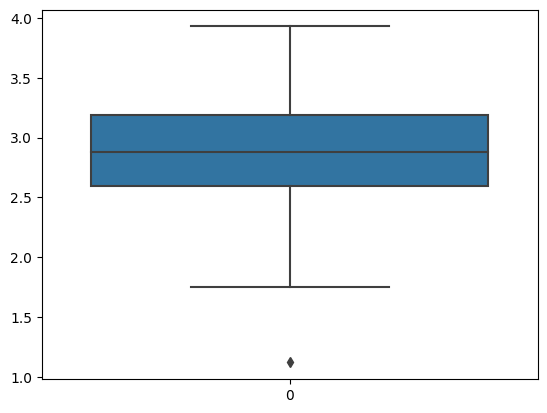

In [69]:
df['total_bill_trans'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

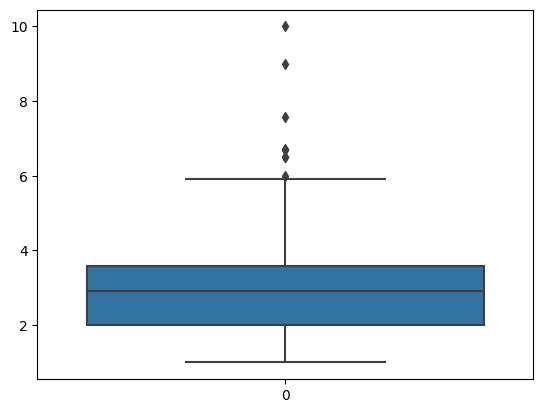

In [71]:
sns.boxplot(df['tip'])
plt.show()

In [72]:
q1 = df['tip'].quantile(.25)
q3 = df['tip'].quantile(.75)
iqr = q3 - q1

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print("Lower Whisker:", lower_whisker, ". Upper Whisker:", upper_whisker, ".")

Lower Whisker: -0.36250000000000027 . Upper Whisker: 5.9375 .


In [75]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] < upper_whisker) ]
#Not very efficient method to remove outliers.
print(df_out.count())

total_bill          235
tip                 235
sex                 235
smoker              235
day                 235
time                235
size                235
total_bill_trans    235
dtype: int64


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [76]:
df1 = pd.get_dummies(df, drop_first=True)
print(df1.head())


   total_bill   tip  size  total_bill_trans  sex_Male  smoker_Yes  day_Sat  \
0       16.99  1.01     2          2.832625     False       False    False   
1       10.34  1.66     3          2.336020      True       False    False   
2       21.01  3.50     3          3.044999      True       False    False   
3       23.68  3.31     2          3.164631      True       False    False   
4       24.59  3.61     4          3.202340     False       False    False   

   day_Sun  day_Thur  time_Lunch  
0     True     False       False  
1     True     False       False  
2     True     False       False  
3     True     False       False  
4     True     False       False  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [80]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range = tb_max - tb_min
mm = MinMaxScaler()
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

## For reference / self study: 
##   StandardScaler:= Mean/Standard Deviation. Mean = 0, SD = 1. Used for STANDARDIZE THE DATA.
##   MinMaxScaller:= Min/Max. Range = 1. Used in cases where range should NOT exceed ONE.


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [84]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)
x = tips_df.drop('tip', axis=1)
y = tips_df['tip']


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

mm = MinMaxScaler()
X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])



(170, 6) (74, 6)
(170,) (74,)


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

### Happy Learning:)